In [1]:
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

import sys
sys.path.append('../')

from src.algo.pg import PGAgent
from src.envs import VehliceEnvPartialNorm

In [8]:
rnn_path = '../data/iqcrnn/vehicle_partial_norm_rnn_10-05-2022_16-58-34/2/'
# rnn_path = '../data/iqcrnn/vehicle_partial_norm_rnn_proj_10-05-2022_17-29-00/2/'

prefs = ['best_', 'e000_', 'e100_', 'e200_', 'e300_', 'e400_', 'e500_']

agents = {
    px[:-1]: PGAgent.load(rnn_path + px)
    for px in prefs
}
agents

{'best': <src.algo.pg.PGAgent at 0x139bb4e48>,
 'e000': <src.algo.pg.PGAgent at 0x13d3bc390>,
 'e100': <src.algo.pg.PGAgent at 0x13d3379b0>,
 'e200': <src.algo.pg.PGAgent at 0x13d3e8c88>,
 'e300': <src.algo.pg.PGAgent at 0x13d3ac898>,
 'e400': <src.algo.pg.PGAgent at 0x13d313f98>,
 'e500': <src.algo.pg.PGAgent at 0x13d3f4128>}

In [9]:
env = VehliceEnvPartialNorm()
env

In [10]:
def get_traj_plot(agent, horizon=200, save_path=None):
    points = [[(-1)**((i//8)%2)/2*10, (-1)**((i//4)%2)/4*10, (-1)**((i//2)%2)/20*10, (-1)**(i%2)/4*10]for i in range(2**4)]
    
    fig, axs = plt.subplots(4, 1, dpi=300, figsize=(3.5, 2.4))
    axs[0].set_xticks([])
    axs[1].set_xticks([])
    axs[2].set_xticks([])
    axs[0].set_ylim(-10, 10)
    axs[0].set_xlim(0, 200)
    axs[0].set_ylabel("$x_1$")
    axs[1].set_ylim(-7, 7)
    axs[1].set_xlim(0, 200)
    axs[1].set_ylabel("$x_2$")
    axs[2].set_ylim(-1, 1)
    axs[2].set_xlim(0, 200)
    axs[2].set_ylabel("$x_3$")
    axs[3].set_ylim(-7, 7)
    axs[3].set_xlim(0, 200)
    axs[3].set_ylabel("$x_4$")

    axs[3].set_xlabel("Time Steps")
    
    c = 'tab:blue' if 'proj' in rnn_path else 'tab:orange'
    for px in tqdm(points):
        states = agent.sample_trajectory(env, False, init_state=px, horizon=horizon, sample=False)['state']
        axs[0].plot(states[:, 0], color=c)
        axs[1].plot(states[:, 1], color=c)
        axs[2].plot(states[:, 2], color=c)
        axs[3].plot(states[:, 3], color=c)

    if save_path is None:
        plt.show()
    else:
        plt.tight_layout()
        plt.savefig(save_path)

100%|██████████| 16/16 [00:02<00:00,  7.44it/s]


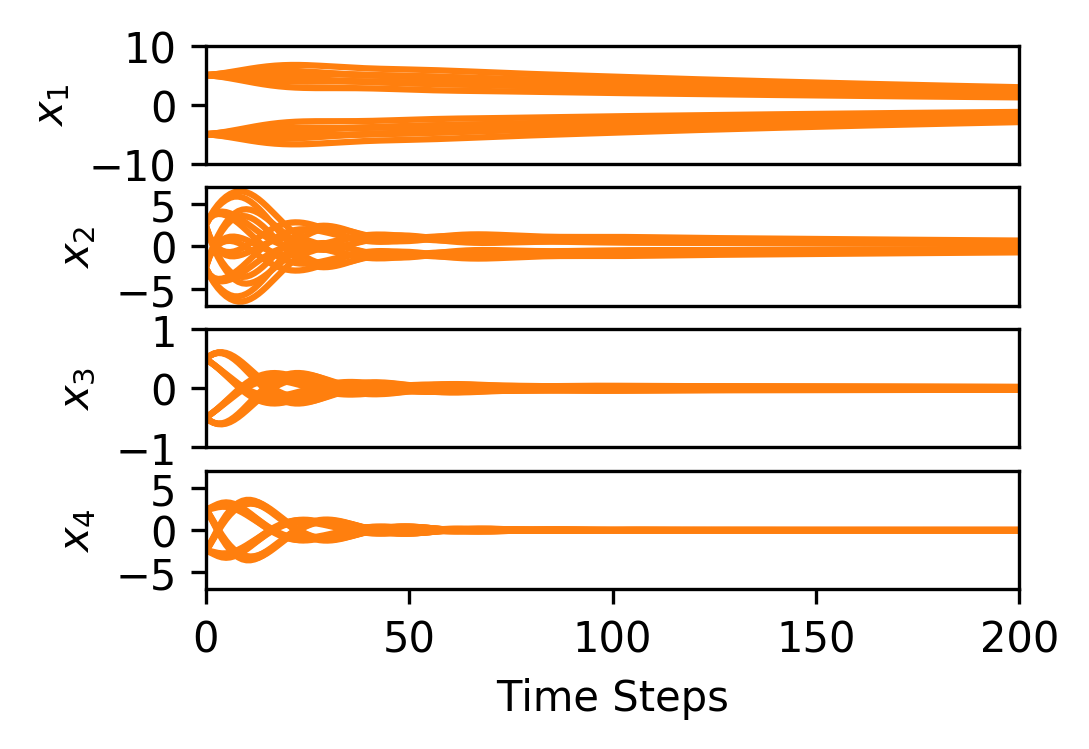

In [11]:
get_traj_plot(agents['e500'])

100%|██████████| 16/16 [00:02<00:00,  7.25it/s]


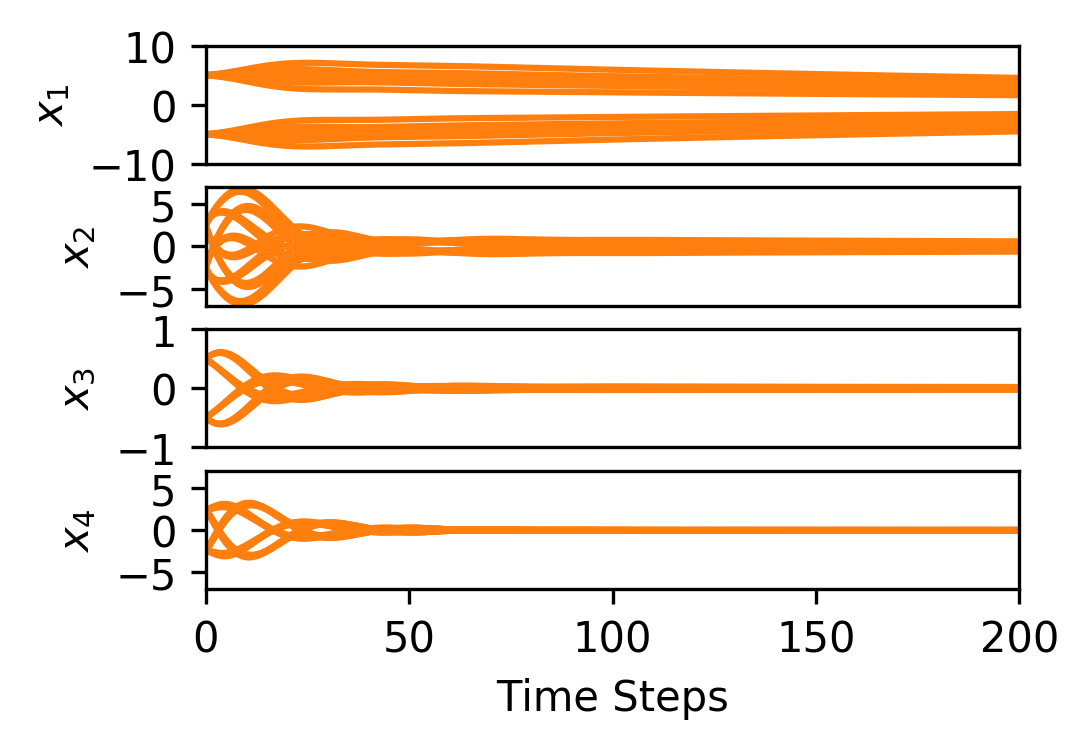

In [12]:
get_traj_plot(agents['best'])